## Minería de Datos (Master en Data Science, UIMP-UC)

## S10. Práctica k-NN

### Rodrigo Manzanas   
#### 2 Diciembre 2021

Como se explicó en la sesión de teoría, la técnica k-NN puede utilizarse tanto para **clasificación** como para **regresión**. En esta práctica vamos a trabajar con el dataset *MNIST* para clasificación de dígitos en imágenes y con datos meteorológicos para predecir la lluvia diaria en Lisboa. Utilizaremos los paquetes y funciones ya vistos.

### Aplicación de la técnica k-NN para clasificación
Para este ejemplo utilizaremos el dataset *MNIST*. Como ya habéis visto, se trata de reconocer dígitos (0, 1, ..., 9) en una colección de imágenes. En primer lugar cargamos el dataset (sólo la parte de train) con la función *read.csv* y convertimos a factor nuestra variable objetivo (primera columna). El fichero *.csv* se puede descargar de Moodle.

In [4]:
# loading dataset
data = read.csv("/home/jovyan/DataMining/Data/MNIST_train.csv")
# converting target variable to factor
data[,1] = as.factor(data[,1])
str(data)
head(data, 10)
summary(data)

'data.frame':	3628 obs. of  785 variables:
 $ label   : Factor w/ 10 levels "0","1","2","3",..: 2 1 2 5 1 1 8 4 6 4 ...
 $ pixel0  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel2  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel4  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel5  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel6  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel7  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel8  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel9  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel10 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel11 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel12 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel13 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel14 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel15 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel16 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel17 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel18 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel19 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pixel20 : int  0 0 0 0 0 0 0 0 0 0 ..

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


     label          pixel0      pixel1      pixel2      pixel3      pixel4 
 1      : 403   Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 2      : 392   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 6      : 371   Median :0   Median :0   Median :0   Median :0   Median :0  
 0      : 366   Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 7      : 366   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 5      : 356   Max.   :0   Max.   :0   Max.   :0   Max.   :0   Max.   :0  
 (Other):1374                                                              
     pixel5      pixel6      pixel7      pixel8      pixel9     pixel10 
 Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :0   Median :0   Median :0   Median :0   Median :0  
 Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:0   3r

Puesto que el dataset es muy grande (casi 4000 muestras), trabajaremos sólo con las 2000 primeras instancias. De entre éstas, nuestro dataset de train estará formado por las 1000 primeras, y el de test por las 1000 segundas.

In [6]:
## train/test partition 50%
indtrain = 1:1000
indtest = 1001:2000
data.train = data[indtrain,] 
data.test = data[indtest,]

El primer ejercicio consistirá en utilizar la función *knn* (paquete *class*) para clasificar los dígitos de test, considerando para ello los 5 vecinos más cercanos en el train. Calcula la tasa de aciertos (total) sobre el test.

In [7]:
# k-NN (with 5 nearest neighbors)
library(class)
pred = knn(data.train[,-1], data.test[,-1], data.train$label , k = 5)
sum(pred == data.test$label) / length(pred)

[1] 0.868

Hemos visto que el error "global" de clasificación de nuestro método k-NN (con k=5) está en torno al 15%. Vamos a generar ahora un barplot con la tasa de aciertos para cada dígito (0, 1, ..., 9) que nos permita hacer un ranking con los mejor y peor clasificados.  
**Preguntas:** ¿Cuál es el dígito que mejor se clasifica? ¿Y el peor?

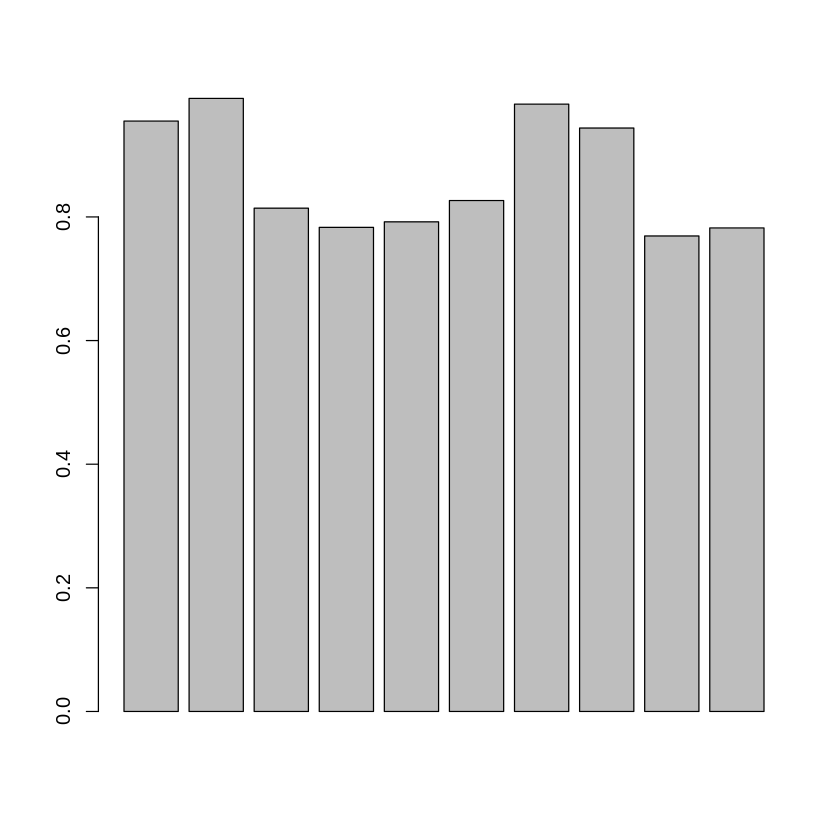

In [8]:
# best and worst classified digits
acc.digit = c()
for (digit in 0:9) {
  ind.digit = which(data.test$label == digit)
  acc.digit = c(acc.digit, 
                sum(pred[ind.digit] == digit) / length(ind.digit))
}
bp = barplot(acc.digit)

Para tratar de entender un poco mejor estos resultados, vamos a visualizar los 9 primeros "1" y los 9 primeros "8" que aparezcan en el dataset (*image*):

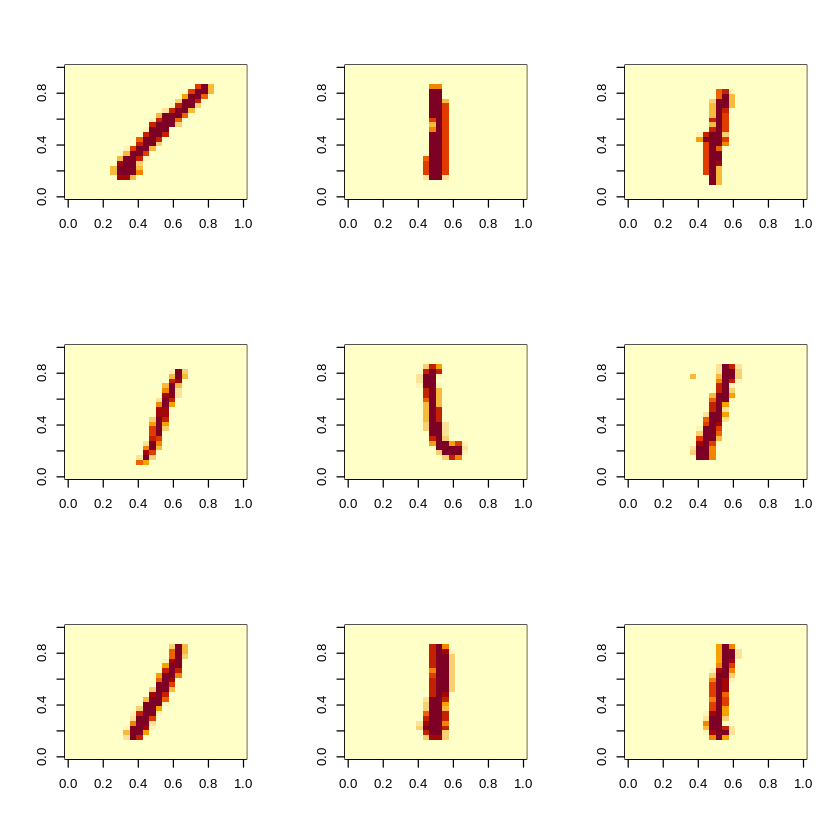

In [13]:
# nine first "1" images
ind1 = which(data[,1] == 1)
par(mfrow = c(3,3))
for (i in 1:9) {
  image(t(apply(matrix(as.numeric(data[ind1[i], -1]), 
                     nrow = 28, ncol = 28, byrow = TRUE),
              2, rev)))
} 

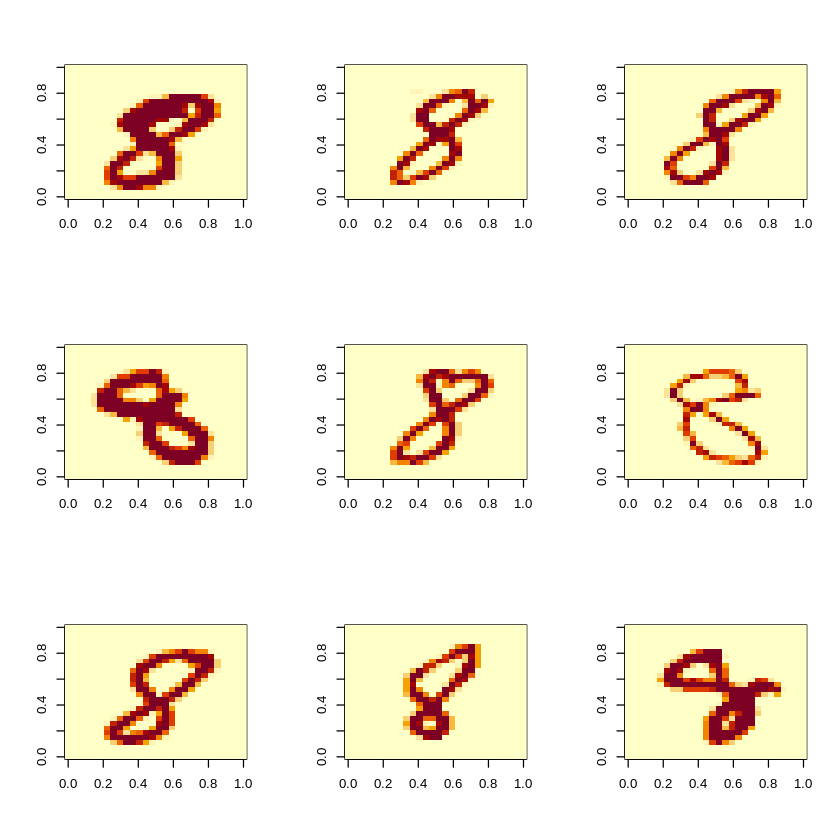

In [16]:
# nine first "8" images
ind1 = which(data[,1] == 8)
par(mfrow = c(3,3))
for (i in 1:9) {
  image(t(apply(matrix(as.numeric(data[ind1[i], -1]), 
                     nrow = 28, ncol = 28, byrow = TRUE),
              2, rev)))
} 

Para evaluar como influye la elección del parámetro k en nuestros resultados, repetiremos el mismo experimento pero considerando todos los k impares entre 1 y 21.   
**Preguntas:** ¿Se obtiene alguna conclusión general sobre el efecto que tiene k en nuestras predicciones? ¿Es ese efecto más importante para algún dígito concreto?

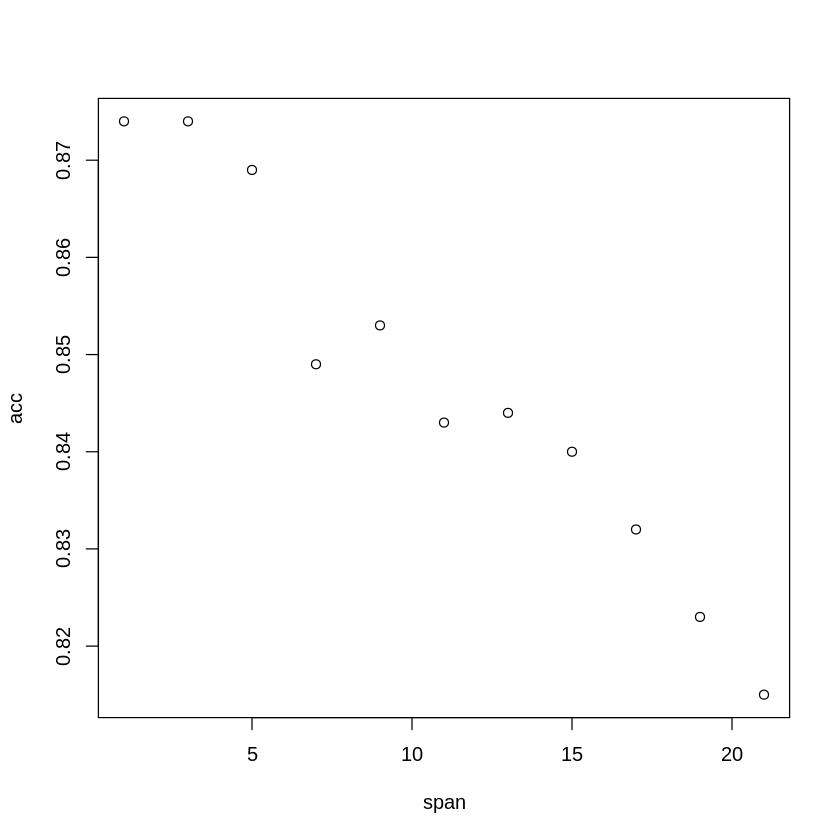

In [17]:
# effect of changing k for general accuracy
span = seq(1, 21, by = 2)
acc = c()
for(k in span){
    pred = knn(data.train[,-1], data.test[,-1], data.train$label , k = k)
    acc = c(acc, sum(pred == data.test$label) / length(pred))
}

plot(span, acc)

In [ ]:
# effect of changing k (sin terminar)
span = seq(1, 21, by = 2)
acc = c()
for(k in span){
    pred = knn(data.train[,-1], data.test[,-1], data.train$label , k = k)    
    for (digit in 0:9) {
      ind.digit = which(data.test$label == digit)
      acc.digit = c(acc.digit, 
                    sum(pred[ind.digit] == digit) / length(ind.digit))
    }
}



### Aplicación de la técnica k-NN para regresión 
Como ya se explicó, en el *downscaling* estadístico se trata de predecir variables meteorológicas de escala local (por ejemplo la precipitación y/o temperatura observada en un punto determinado) a partir de variables de larga escala dadas por un modelo númerico del clima cuya resolución espacial es mucho menor (por ejemplo, la presión o los vientos en dominios sinópticos). En este ejemplo utilizaremos la técnica k-NN para intentar predecir la lluvia diaria observada en Lisboa (predictando) a partir de un conjunto de variables de larga escala (predictores).  
En primer lugar cargamos el dataset *meteo.csv*, que os podéis descargar de Moodle. Como el dataset es muy grande nos quedaremos sólo con los primeros 2000 días (filas). Además, eliminaremos la primera columna (es un simple contador). A partir de este momento tendremos un dataset (llámalo *df*) con 2000 filas y 321 columnas (compruébalo). La primera columna será nuestra variable objetivo (precipitación en Lisboa), y las 320 restantes nuestros predictores. Renombramos como *precip* nuestra variable objetivo.

In [19]:
# loading data
data = read.csv("/home/jovyan/DataMining/Data/meteo.csv")
df = data[1:2000, -1]; rm(data)
colnames(df)[1] = "precip"
str(df)

'data.frame':	2000 obs. of  321 variables:
 $ precip: num  10.9 0.6 13 0 0 1.2 1.1 0 0 0.7 ...
 $ X1    : num  57043 56963 56523 54628 53584 ...
 $ X2    : num  56535 56493 55971 53980 53391 ...
 $ X3    : num  55884 55931 55304 53494 53310 ...
 $ X4    : num  55176 55340 54498 53073 53293 ...
 $ X5    : num  54458 54769 53725 52616 53340 ...
 $ X6    : num  56980 56857 56515 54776 53782 ...
 $ X7    : num  56461 56362 55978 54089 53498 ...
 $ X8    : num  55800 55777 55327 53517 53307 ...
 $ X9    : num  55051 55164 54570 53013 53213 ...
 $ X10   : num  54319 54585 53863 52501 53157 ...
 $ X11   : num  56900 56724 56467 54908 54015 ...
 $ X12   : num  56368 56187 55965 54205 53674 ...
 $ X13   : num  55721 55587 55360 53594 53378 ...
 $ X14   : num  54946 54947 54646 53021 53200 ...
 $ X15   : num  54145 54367 53999 52451 53055 ...
 $ X16   : num  56816 56568 56401 55059 54327 ...
 $ X17   : num  56257 55987 55902 54295 53911 ...
 $ X18   : num  55559 55360 55339 53657 53529 ...
 $ X1

Ya que las vamos a necesitar posteriormente, crearemos una nueva variable *y* (vector predictando con la precipitación en Lisboa) y otra *x* (matriz con los predictores de larga escala).

In [20]:
# new variables x and y
y = df[, 1]  # predictand (vector)
x = df[, -1]  # predictors (matrix)

Para visualizar los datos, dibuja la serie diaria de precipitación observada y el promedio de los 320 predictores.

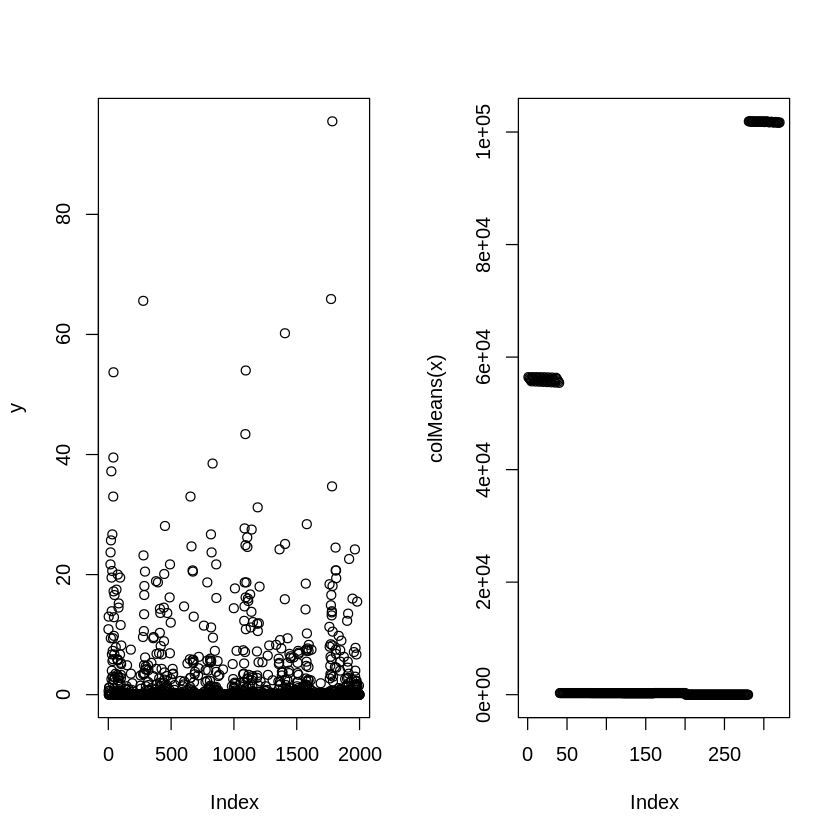

In [21]:
# data visualization
par(mfrow = c(1,2))
plot(y)
plot(colMeans(x))

**Pregunta:** ¿Qué dirías sobre los predictores? ¿Crees que habría que tener algún cuidado especial al trabajar con la técnica k-NN en este caso?

Nuestro siguiente paso será dividir el dataset total en dos subconjuntos independientes de train y test (75% y 25%, respectivamente), escogidos aleatoriamente. Crea las variables *df.train*, *df.test*, *x.train*, *y.train*, *x.test*, *y.test*.

In [22]:
## train/test partition
n = nrow(df)
indtrain = sample(1:n, round(0.75*n))
indtest = setdiff(1:n, indtrain)

# 75% train
df.train = df[indtrain, ]
x.train = x[indtrain, ]
y.train = y[indtrain]

# 25% test
df.test = df[indtest, ]
x.test = x[indtest, ]
y.test = y[indtest]

Ya estamos en condiciones de buscar el *k* óptimo para nuestro método k-NN. Para ello emplearemos *caret* (método *knn*). Considera una cross-validación hold-out sobre el dataset de train y barre todos los *k* impares desde 1 a 30. El argumento *preProcess* de la función *train* permite estandarizar los predictores.  
**Pregunta:** ¿Cómo varía la métrica de validación RMSE con *k*? ¿Por qué crees que ocurre esto? ¿Cuál es el *k* óptimo?

,k
,<dbl>
3,5


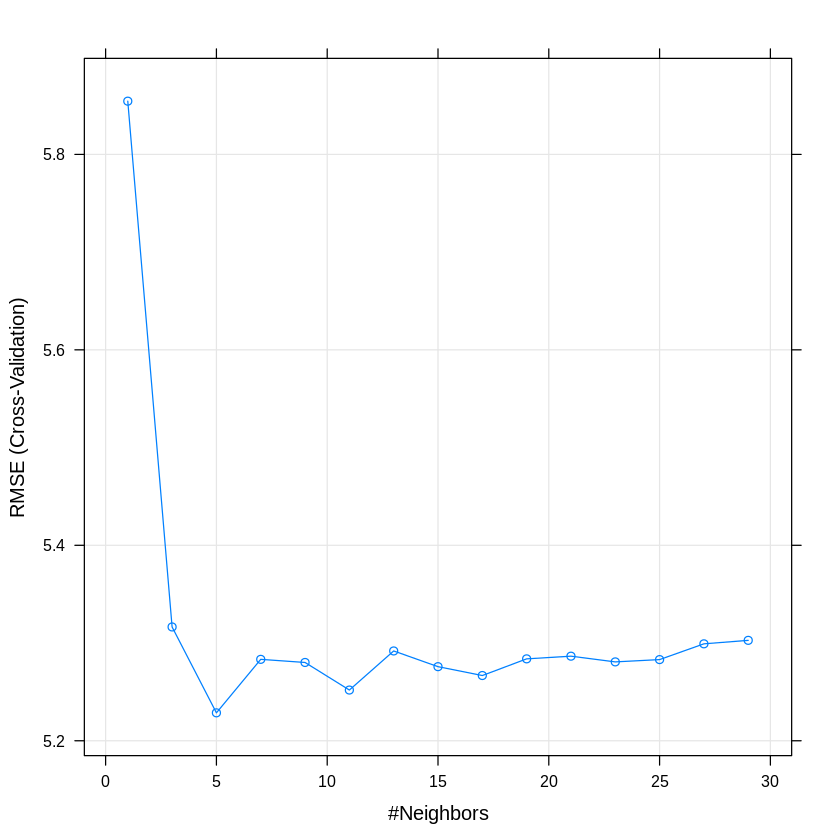

In [24]:
## fitting model with caret
library(caret)
trctrl = trainControl(method = "cv", number = 2)

knn.fit = train(precip ~ ., df.train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(k = seq(1,30,2)))

plot(knn.fit)
knn.fit$bestTune

Hemos visto que el RMSE disminuye con *k*. Pero para determinar cuán buena/mala es nuestra predicción no podemos fijarnos en una única medida, sino que debemos tener en cuenta un abanico más amplio de métricas que nos permitan caracterizar otros aspectos de la predicción que puedan ser de interés. En esta práctica consideraremos, además del RMSE, las siguientes métricas de validación:  

* Tasa de aciertos (o *accuracy*): permite evaluar el evento binario *lluvia/no lluvia*. Se suele tomar la cantidad 0.1mm como umbral para definir días de lluvia.
* Correlación de Spearman: permite evaluar cuán bien la serie temporal predicha (completa) sigue la observación. Se puede calcular en *R* utilizando la función *cor*.
* *Ratio* de varianzas: permite evaluar hasta qué punto la variabilidad total de nuestra predicción (serie completa) se asemeja a la observada. Se calcula como var(pred) / var(obs).

Utiliza la configuración óptima que hemos obtenido con *caret* para predecir la lluvia en el test, y valida los resultados en función de estas 4 métricas.  
**Preguntas:** ¿Qué resultados obtienes? ¿Dirías que tu predicción es buena? ¿Mala? ¿Por qué?

In [ ]:
pred = predict(knn.fit, ***)

## validation
# RMSE
rmse <- function(x, y) {
    stopifnot(length(x) == length(y))
    sqrt(mean((x - y)^2))
}
val.rmse = ***

# Spearman correlation
val.r = ***

## accuracy binary
acc.class = function(x, y) {
  stopifnot(length(x) == length(y))
  return(sum(diag(table(x, y))) / length(x))
}
val.bin = ***

# ratio of variances
val.rv = ***

cbind(val.rmse, val.r, val.bin, val.rv)

Vamos a ver ahora cómo varían las 4 métricas de validación consideradas con *k*. Para ello, crea un bucle que barra todos los *k* desde 1 hasta 30 y calcula en cada iteración el RMSE, la correlación de Spearman, el accuracy (binario) y el ratio de varianzas. Plotea los resultados.  
**Nota:** Utiliza la función *knn.reg* (paquete *FNN*). Recuerda escalar los predictores (*scale*).  
**Preguntas:** ¿Qué conclusiones obtienes? ¿Cuál sería para tí un *k* óptimo?

In [ ]:
library(FNN)

## validating
val.rmse = c()
val.r = c()
val.bin = c()
val.rv = c()
for (k in 1:30) {
  print(sprintf("... trying k = %d ...", k))
  pred = knn.reg(train = ***, test = ***, y = ***, k = ***)
  ***
}

## plotting
par(mfrow = c(2,2))
plot(***); grid()
plot(***); grid()
plot(***); grid()

En la sesión de teoría se comentó que es frecuente el uso de técnicas avanzadas (como el análisis de Componentes Principales) que permiten reducir la dimensionalidad de nuestro problema sin pérdida de información efectiva. En las próximas sesiones se verán en profundidad este tipo de técnicas. Sin embargo, vamos a ilustrar aquí la filosofía de las mismas con dos ejemplos muy sencillos. En primer lugar, haremos un entresacado de predictores no informado (1 de cada 5) para reducir el número de variables que entran en nuestro modelo.

In [ ]:
# not informed regular extraction
nx = ncol(x.train)
ind.extr = seq(1, nx, 5)

Otra forma un poco más dirigida de reducir la dimensionalidad de nuestro problema consiste en realizar un análisis de correlaciones. Se calcula la correlación (de Spearman) entre nuestra variable objetivo (lluvia) y todas las variables predictoras (larga escala) disponibles. La idea es que, cuanto más fuerte sea esta correlación, mayor es el vínculo físico entre predictando y predictor, y por tanto, más útil es la información que nos aporta ese predictor. Este análisis nos permite descartar aquellos predictores cuya correlación con el predictando no supere cierto umbral.  
Siguiendo esta idea, vamos a calcular la correlación existente entre nuestro predictando y los 320 predictores disponibles, y eliminaremos aquellos con correlaciones entre -0.4 y 0.4.  
**Pregunta:** ¿Cuánto se ha reducido la dimensionalidad de tu problema?

In [ ]:
# informed selection
r.xy = c()
for (ivar in 2:nx) {
  r.xy[ivar] = ***
}
plot(***)
grid()

Tal y como hicimos antes (utilizando todos los predictores), obtén la predicción en el test para el caso del entresacado no informado de predictores y para la selección informada de los mismos, con k desde 1 hasta 30. Evalúa estas predicciones en función de las 4 métricas de validación consideradas en el ejemplo anterior. Plotea en el mismo gráfico los resultados obtenidos para todos los predictores, el entresacado no informado de predictores y la selección informada.  
**Pregunta:** ¿Qué conclusiones obtienes?

In [ ]:
## validating
val.extr.rmse = c()
val.extr.r = c()
val.extr.bin = c()
val.extr.rv = c()

val.sele.rmse = c()
val.sele.r = c()
val.sele.bin = c()
val.sele.rv = c()

for (k in 1:30) {
  print(sprintf("... trying k = %d ...", k))
  
  # not informed extraction
  pred.extr = knn.reg(train = ***, test = ***, y = ***, k = ***)
  ***
  
  # informed selection
  pred.sele = knn.reg(train = ***, test = ***, y = ***, k = ***)
  ***   
}

## plotting
par(mfrow = c(2,2))
matplot(***); grid()
matplot(***); grid()
matplot(***); grid()
matplot(***); grid()